<b>PLEASE NOTE:</b> this software was initially intended for quick & easy use via command-line interface (CLI). However, I know some folks love their jupyter notebook so I made copies of the more important classes and features that are compatible with Ipython for demonstrative purposes. Most of the functions used here are saved to the `sortasurvey.notebook` script.

In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sortasurvey.notebook import Survey, rank

# $\rm \textbf{Step #1: Create your Survey}$

In [2]:
TKS = Survey(verbose=True, path_sample='info/TKS_sample.csv', path_survey='info/survey_info.csv',
             path_priority='info/high_priority.csv', path_ignore='info/no_no.csv', iter=1, 
             hours=10., nights=50., save=True, note='', notebook=True, progress=True, )

This is showing all of the default keyword arguments for the `Survey` class, with the exceptions of `path_priority` and `path_ignore`. These are both defaulted to `None` but necessary for this example (and are actually really helpful to use once you get the hang of them).

## *The two <i><u>key</u></i> pieces to your successful `Survey` are the <u>sample</u> and the <u>programs</u>!*

So let's start with the sample. The sample to select targets from is set as the `Survey.sample` attribute (convenient, I know). For target selection of individual `Survey` programs, selection criteria must match the column headers provided in the sample in order for this to work properly (i.e. the script uses the `pandas.Dataframe.query` [module](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) if anyone is familiar with that).<br>

So, let's take a look at what columns are available for target selection purposes!

In [3]:
candidates = TKS.sample

print(candidates.columns.values.tolist())

['toi', 'tic', 'cps_name', 'evol', 'source', 'disp', 'photo_vetting', 'spec_vetting', 'ao_vetting', 'ra', 'dec', 'tmag', 'tmag_err', 'bmag', 'vmag', 'b_v', 'jmag', 'hmag', 'kmag', 'gmag', 'nobs', 'last_observed', 'template', 'nobs_goal', 'tot_time', 'rem_nobs', 'rem_time', 'rs', 'rs_err', 'r_s', 'm_s', 'teff', 'teff_err', 't_eff', 'teff_jump', 'logg', 'logg_err', 'logg_jump', 'feh', 'f_eh', 'ast_det_c', 'c_sector', 'ast_det_t', 't_sector', 'color', 'vsini', 'prot', 'sval', 'sigma_act', 'sigma_rot', 'sigma_gran', 'sigma_rv', 'sigma_tot', 'limit', 'logrhk', 'ruwe', 'rp', 'rp_err', 'mp', 'k', 'kerr', 'ksig', 'epoch', 'epoch_err', 'period', 'period_err', 'dur', 'dur_err', 'a_to_R', 'depth', 'depth_err', 'teq', 'sinc', 'SNR', 'nobs_5sig', 'rt_5sig', 'tt_5sig', 'nobs_10sig', 'rt_10sig', 'tt_10sig', 'alerted', 'updated', 'drop', 'finish', 'npl', 'select_DG', 'in_other_programs', 'n_select', 'priority', 'in_SC1A', 'in_SC1B', 'in_SC1C', 'in_SC1D', 'in_SC1E', 'in_SC2A', 'in_SC2Bi', 'in_SC2Bii', 

^^ yikes, now that's a lot of columns (but also incredibly helpful if you want to select the best possible targets for your survey)!

Similar to the sample, the `Survey` program information is stored to (yup, you guessed it) `Survey.programs`. This is also a pandas.DataFrame with program names as the index to make it easier to access specific information for a given program.

### <b>The complete list of TKS programs is:</b>

In [4]:
print(TKS.programs.index.values.tolist())

['SC1A', 'SC1B', 'SC1C', 'SC1D', 'SC1E', 'SC2A', 'SC2Bi', 'SC2Bii', 'SC2C', 'SC3', 'SC4', 'TOA', 'TOB']


---------------------
## A crash course into the TESS-Keck Survey (TKS) science goals:

<b>SC1A \[Fulton Gap\]:</b> Probing compositions across the planet radius gap to constrain the physical mechanism(s) causing the bimodal planet radius distribution <br>
<b>SC1B \[Stellar Flux & Gaseous Envelopes\]:</b> Analyzing the diversity of gaseous envelopes and their dependence on properties like stellar mass, incident flux, activity level, and other properties <br>
<b>SC1C \[USPs\]:</b> Using ultra-short period planet compositions as a window into the refractory cores of small planets <br>
<b>SC1D \[Habitable Zone\]:</b> Identifying and characterizing planets orbiting in (or near) the habitable zone of of their host star <br>
<b>SC1E \[Planet-Star Correlations\]:</b> Exploring dependencies of bulk planet properties (densities) with different stellar properties i.e. $M_{\star}$ <br>
<b>SC2A \[Distant Giants\]:</b> Understanding the occurrence and connection between close-in small planets and distant giant planets <br>
<b>SC2Bi \[Eccentricities\]:</b> Characterizing the eccentricities of sub-Jovian planets to elucidate the possible formation and/or evolution pathways for dynamically 'hot' planets<br>
<b>SC2Bii \[Obliquities\]:</b> Measuring spin-orbit (mis)alignments of previously unexplored parameter spaces (i.e. young stars) to trace formation histories and past dynamical interactions <br>
<b>SC2C \[Multis\]:</b> Examining the diversity and/or uniformity of properties for planets in multi-planet systems <br>
<b>SC3 \[Atmospheres\]:</b> Identifying intriguing planets amenable to atmospheric characterization using transmission and/or eclipse spectroscopy <br>
<b>SC4 \[Evolved\]:</b> Investigating the role and degree to which stellar evolution plays in shaping post-main sequence planetary systems <br>
<b>TOA \[Stellar Properties\]:</b> Homogeneously determining fundamental stellar properties derived from spectroscopy, asteroseismology, and astrometry <br>
<b>TOB \[Activity\]:</b> Studying the relationship between Doppler jitter with various stellar astrophysical phenomena <br>

----

Now that we have a basic understanding of what these science keys mean, let's take a look at some examples. We'll start with the TKS multis (SC2C) program criteria:

In [5]:
case = 'SC2C'

print(TKS.programs.loc[case])

name                                                            SC2C
method                                    hires-nobs=100-counts=ramp
filter             photo_vetting == 'passed' and spec_vetting != ...
prioritize_by                                     [npl, actual_cost]
ascending_by                                           [False, True]
remaining_hours                                               47.619
n_maximum                                                          4
total_time                                                    47.619
high_priority                                                     []
n_targets_left                                                     4
pick_number                                                        0
Name: SC2C, dtype: object


Multi-planet systems are more challenging to characterize through RVs thus requiring more observations than the default ($n=60$) observations for other TKS programs (e.g., shown above with $nobs=100$). SC2C is actually an excellent example since it also has more than one prioritization metric, which first sorts by the planet multiplicity. Then for systems with the same number of planets, the selected target will be the cheapest target at that specific iteration (which may not necessarily be the brightest, but also could be a system that is shared amongst several TKS science programs). 

<br>

SC2A is probing more long-term characteristics in the system (looking for distant companions) and therefore requires less precision and lower-cadence observations. You will see the entirely different observing `method` printed below. Additionally, SC2A gets to use borrowed time from another program that doesn't require all of its allocation. Therefore, you'll see that even though it has the same allocation as SC2C, the total time is incremented by +14.1 hours (which can be done by specifying this in the `info/survey_info.csv`, under the `remaining_hours` column).

In [6]:
case = 'SC2A'

print(TKS.programs.loc[case])

name                                                            SC2A
method                                       hires-nobs=15-counts=60
filter             select_DG == 1 and toi != 1469.01 and toi != 1...
prioritize_by                                                 [vmag]
ascending_by                                                  [True]
remaining_hours                                               61.719
n_maximum                                                         50
total_time                                                    61.719
high_priority      [1469.01, 1773.01, 1611.01, 509.01, 1435.01, 1...
n_targets_left                                                    50
pick_number                                                        0
Name: SC2A, dtype: object


The distant giants science case (SC2A) is also special and dissimilar to other TKS science cases for a couple other reasons:
1) it is the only TKS science that does not care about discounts for shared targets, as it is a magnitude-limited 3-year survey. You can see that the prioritization metric for this program only cares about the visual magnitude.

2) the target selection process for SC2A was very complex s.t. it could not be automated through the same means as the other programs (via `filter`). Therefore, this program is a great demonstration for how to "force" your target list, which essentially can be done by providing the entire ranked list as `high_priority` targets. High priority targets are hand-selected in the order in which they are provided and thus does not care about or know prioritization metrics/preferences.

See the long list of high priority targets for SC2A below:

In [7]:
print(TKS.programs.loc['SC2A','high_priority'])

[1469.01, 1773.01, 1611.01, 509.01, 1435.01, 1742.01, 1339.01, 1247.01, 1437.01, 1797.01, 1471.01, 1751.01, 1716.01, 1710.01, 1451.01, 1723.01, 1824.01, 1416.01, 1255.01, 1691.01, 1669.01, 1794.01, 1288.01, 1411.01, 1422.01, 1443.01, 1279.01, 1823.01, 1758.01, 1444.01, 1438.01, 1174.01, 1180.01, 1173.01, 1706.01, 1249.01, 1410.01, 1194.01, 1472.01, 1694.01, 1235.01, 465.01, 1269.01, 1246.01, 1775.01, 1272.01, 1248.01, 1753.01, 1244.01, 1759.01]


#### Essentially the way this is set up now, each science case in the survey needs:

1) an observing strategy (via `method`) <br>
2) selection criteria (via `filter`) <br>
3) prioritization metrics (via `prioritize_by` and `ascending_by`) <br>
4) fractional allocation <br>

#### As well as the optional:

5) maximum number of selections (via `n_maximum`) <br>
6) additional allocation (via `remaining_hours`) <br>
7) high priority targets (in the `info/high_priority.csv`) <br>
8) targets to ignore (in the `info/no_no.csv`) <br>

<b>NOTE: a program's `remaining_hours` and `pick_number` are updated during the target selection process, providing ways to identify when the selection process would otherwise crash (i.e. if a selected program cannot afford their selected target or if the program runs out of relevant selections, the latter of which happened in the early days of TESS for the habitable zone science case).</b>

-------
# $\rm \textbf{Step #2: Rank your Targets}$
<br>
Well not necessarily <b><i>you</i></b> per se, but execute the script so that your computer can select your targets for you!

Ok, so now that all of the boring stuff is out of the way, let's select some targets...

For each iteration, the `Survey.sample` and `Survey.programs` are copies to `Survey.candidates` and `Survey.sciences` respectively, which are the survey attributes that get modified during the target selection (just an FYI) in order to preserve the original survey information.

In [8]:
rank(TKS)


 -----------------------------
 -- prioritization starting --
 -----------------------------

   - loading sample and survey science information
   - 785 targets make the standard survey cuts
   - 242 have also passed various vetting steps
   - ranking algorithm initialized using 50.0 nights (10.0 hr/n)
   - algorithm took 49 seconds to run
   - 85 targets were selected
   - Making data products, including:
     - a copy of the updated sample info
     - algorithm history (via ranking steps)
     - the final prioritized list (via observing priorities)
     - final costs saved
     - program overlap
     - txt file w/ run info

 ------------------------------
 ----- process - complete -----
 ------------------------------

Wed 06/09/21 04:51PM

Out of the 86 total targets:
  - SC1A has 31 targets
  - SC1B has 30 targets
  - SC1C has 6 targets
  - SC1D has 4 targets
  - SC1E has 4 targets
  - SC2A has 44 targets
  - SC2Bi has 5 targets
  - SC2Bii has 2 targets
  - SC2C has 4 targets
  -

-------
# $\rm \textbf{Step #3: Peep your Results}$
### $\rm aka\,the\, data\, products \, \& \, what \, they \, mean$
$\rm [this \,is\, all\, conveniently\, saved\, to\, the\, Survey\, class\, object \, for \,you]$

## $\rm \textbf{Data product #1: the final, prioritized (selected) target list}$

(via `args.outdir/observing_priorities.csv`) <br>

Well let's start with the reason you came here for, a survey sample. This synthesizes all steps of the selection process into a single, prioritized list and is saved to `Survey.observed` (which should really be "to-be-observed")

In [9]:
TKS.observed.head()

,overall_priority,tic,toi,programs
0,1,269701147,1339,"[SC3, SC2A, SC1A, SC1B, SC2C]"
1,2,441765914,2088,"[SC1D, SC3, SC1E]"
2,3,317548889,480,"[SC4, SC1A, SC1B]"
3,4,199444169,1410,"[SC1B, SC1A, SC2A, SC3]"
4,5,154383539,1436,"[TOB, SC1C, SC1E]"


## $\rm \textbf{Data product #2: the entire selection process history}$

(via `args.outdir/ranking_steps.csv`) <br>

This is actually my most favorite output, which was initially intended for debugging purposes but was so useful that it ended up sticking around. This data product shows how the target selection happened on a step-by-step bases, but only records when selections were made (and therefore doesn't show when programs could not afford a certain target). For me, it's fun to sort by the program column, where you can see how individual programs made their selections. 12/10 recommend playing around with this

In [10]:
TKS.ranking_steps.head()

,program,program_pick,overall_priority,tic,toi,SC1A,SC1B,SC1C,SC1D,SC1E,SC2A,SC2Bi,SC2Bii,SC2C,SC3,SC4,TOA,TOB,total_time
0,--,0.0,0.0,0.0,0.00,47.619,47.619,47.619,23.810,47.619,61.719,33.519,0.0,47.619,47.619,47.619,0.0,47.619,500.000
1,SC3,1.0,1.0,269701147.0,1339.01,47.619,47.619,47.619,23.810,47.619,61.719,33.519,0.0,47.619,46.702,47.619,0.0,47.619,499.083
2,SC1D,1.0,2.0,441765914.0,2088.01,47.619,47.619,47.619,7.676,47.619,61.719,33.519,0.0,47.619,46.702,47.619,0.0,47.619,482.950
3,SC4,1.0,3.0,317548889.0,480.01,47.619,47.619,47.619,7.676,47.619,61.719,33.519,0.0,47.619,46.702,45.869,0.0,47.619,481.200
4,SC3,2.0,4.0,199444169.0,1410.01,47.619,47.619,47.619,7.676,47.619,61.719,33.519,0.0,47.619,39.271,45.869,0.0,47.619,473.769


## $\rm \textbf{Data product #3: the updated sample}$

(via `args.outdir/path_sample_final.csv`) <br>

The updated sample is only a subset of the original sample, which was filtered on basic survey cuts. For TKS, the main requirements depended on Keck observability ($\delta>-30$) and the Gaia RUWE metric (RUWE<2). It also has some new, perhaps important columns that you would like to know about. For starters, it has added columns for all survey programs, which are booleans for if a target is in a given program or not (this is an easy way to filter out which targets were selected). The same overall priority from the prioritized list discussed above is also copied over here, to keep everything in one place.

In [11]:
TKS.final.head()

,toi,tic,cps_name,evol,source,disp,photo_vetting,spec_vetting,ao_vetting,ra,...,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB
0,103.01,336732616,-,MS,spoc,KP,-,-,-,312.4574,...,0,0,0,0,0,0,0,0,0,0
1,108.01,289793076,-,MS,spoc,KP,-,-,-,316.9615,...,0,0,0,0,0,0,0,0,0,0
2,109.01,29344935,-,MS,spoc,KP,-,-,-,313.2155,...,0,0,0,0,0,0,0,0,0,0
3,123.01,290131778,-,MS,spoc,P,-,-,-,319.6994,...,0,0,0,0,0,0,0,0,0,0
4,143.01,25375553,-,MS,spoc,KP,-,-,-,328.7677,...,0,0,0,0,0,0,0,0,0,0


Let's see which targets were selected for a given program. We haven't talked about the evolved stars (SC4) science case yet, let's take a look at that.

In [12]:
case = 'SC4'

TKS.final[TKS.final['in_%s'%case] == 1]

,toi,tic,cps_name,evol,source,disp,photo_vetting,spec_vetting,ao_vetting,ra,...,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB
38,329.01,169765334,T000329,SG,qlp,LEPC,passed,passed,-,351.320900,...,0,0,0,0,0,0,0,1,0,0
81,480.01,317548889,39688,MS,spoc,CPC,passed,passed,passed,88.378700,...,0,0,0,0,0,0,0,1,0,0
252,1181.01,229510866,T001181,SG,qlp,VPC+,passed,passed,passed,297.215900,...,0,0,0,0,0,0,0,1,0,0
300,1294.01,219015370,T001294,SG,qlp,VPC+,passed,passed,passed,223.092900,...,0,0,0,0,0,0,0,1,0,0
302,1296.01,219854185,T001296,SG,qlp,VPC,passed,passed,passed,256.770900,...,0,0,0,0,0,0,0,1,0,0
303,1298.01,237104103,T001298,SG,qlp,VPC,passed,passed,-,241.323400,...,0,0,0,0,0,0,0,1,0,0
372,1439.01,232982558,T001439,SG,qlp,PC,passed,passed,passed,241.763900,...,0,0,0,0,0,0,0,1,0,0
466,1601.01,139375960,T001601,SG,qlp,VPC?,passed,passed,-,38.361400,...,0,0,0,0,0,0,0,1,0,0
558,1736.01,408618999,T001736,SG,qlp,PC,passed,passed,-,43.435000,...,0,0,0,0,0,0,1,1,0,0
648,1836.01,207468071,148193,SG,qlp,PC,passed,passed,-,245.908200,...,0,0,0,0,0,0,0,1,0,0


## $\rm \textbf{Data product #4: Survey program overlap}$

(via `outdir/program_overlap.csv`) <br>

It's exactly how it sounds.

In [13]:
TKS.overlap.head()

,tic,toi,priority,in_SC1A,in_SC1B,in_SC1C,in_SC1D,in_SC1E,in_SC2A,in_SC2Bi,in_SC2Bii,in_SC2C,in_SC3,in_SC4,in_TOA,in_TOB,total_programs
0,269701147,1339,1,X,X,-,-,-,X,-,-,X,X,-,-,-,5
1,441765914,2088,2,-,-,-,X,X,-,-,-,-,X,-,-,-,3
2,317548889,480,3,X,X,-,-,-,-,-,-,-,-,X,-,-,3
3,199444169,1410,4,X,X,-,-,-,X,-,-,-,X,-,-,-,4
4,154383539,1436,5,-,-,X,-,X,-,-,-,-,-,-,-,X,3


$\rm We \;can\; also \;check \;the \; amount\; of\; overlap\; for\; targets \; selected\; from\; a\; given\; program.$ <br>
$\rm Let's \; use\; SC2A\; (Distant \; Giants) \; as \; an\; example:$

In [14]:
case = 'SC2A'

program = TKS.overlap.query("in_%s == 'X'"%case)

# how many have 4 or more programs?
query = program.query('total_programs >= 4')
print('%d picked targets had large overlap (>= 4 programs) with other programs'%len(query))

7 picked targets had large overlap (>= 4 programs) with other programs


## $\rm \textbf{Data product #5: the final costs per target per program}$

(via `outdir/total_costs.csv`) <br>

Think of this like an itemized receipt... but sorry, this is somewhat special/specific to TKS since it is fairly nitpick-y. However, if you can hack it to work for your survey, it's quite helpful to break down the final costs that each target costs for a given program. For TKS, this also includes the incorporation of archival or already existing observations for a target (and is why the charged time doesn't necessarily equal to the total time).

In [15]:
TKS.costs.head()

,priority,tic,toi,SC1A,SC1B,SC1C,SC1D,SC1E,SC2A,SC2Bi,SC2Bii,SC2C,SC3,SC4,TOA,TOB,nobs_goal,charged_time,total_time
0,1.0,269701147,1339,0.557,0.557,0.000,0.000,0.000,0.0,0.0,0.0,2.58,0.557,0.000,0.0,0.000,100,4.250,8.419
1,2.0,441765914,2088,0.000,0.000,0.000,5.378,5.378,0.0,0.0,0.0,0.00,5.378,0.000,0.0,0.000,60,16.133,17.626
2,3.0,317548889,480,1.762,1.762,0.000,0.000,0.000,0.0,0.0,0.0,0.00,0.000,0.726,0.0,0.000,60,4.250,5.083
3,4.0,199444169,1410,2.477,2.477,0.000,0.000,0.000,0.0,0.0,0.0,0.00,2.477,0.000,0.0,0.000,60,7.431,14.342
4,5.0,154383539,1436,0.000,0.000,9.077,0.000,9.077,0.0,0.0,0.0,0.00,0.000,0.000,0.0,14.991,100,33.146,33.473


-------
# $\rm \textbf{Step #4: Plt your Sample}$

## TKS hosts:

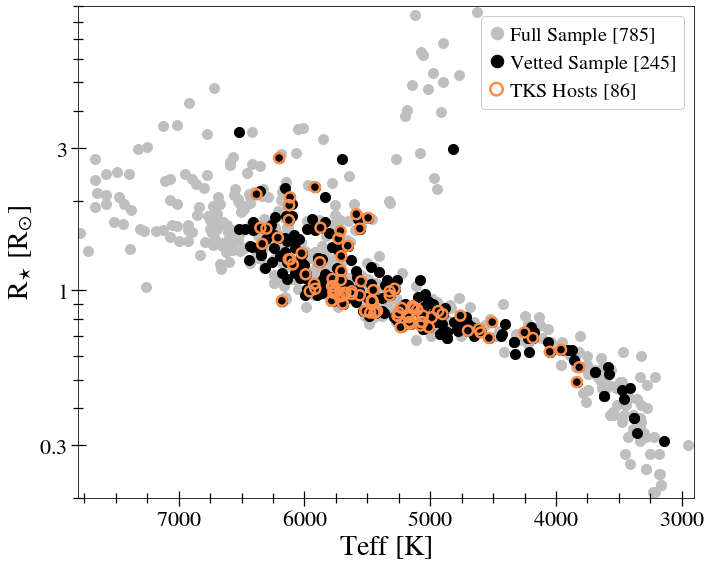

In [25]:
df = TKS.final.copy()
n_all = len(df.drop_duplicates(subset='tic'))
vetted = TKS.final.query("photo_vetting == 'passed' and spec_vetting != 'failed' and spec_vetting != 'do not observe'")
n_vetted = len(vetted.drop_duplicates(subset='tic'))
sample = TKS.final[TKS.final['in_other_programs'] != 0]
n_prog = len(sample.drop_duplicates(subset='tic'))

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.rcParams['mathtext.fontset'] = 'stix'

plt.figure(figsize=(10,8))

ax1 = plt.subplot(1,1,1)

ax1.scatter(df.t_eff.values, df.r_s.values, c = '0.75', s = 100., zorder = 0, label = r'$\rm Full \,\, Sample \,\, [%d]$'%n_all)
ax1.scatter(vetted.t_eff.values, vetted.r_s.values, c = 'k', s = 100., zorder = 1, label = r'$\rm Vetted \,\, Sample \,\, [%d]$'%n_vetted)
ax1.scatter(sample.t_eff.values, sample.r_s.values, c = 'k', s = 100., zorder = 2)
ax1.scatter(sample.t_eff.values, sample.r_s.values, c = 'none', s = 100., lw = 2.5, edgecolor = '#fd8d49', zorder = 3, label = r'$\rm TKS \,\, Hosts \,\, [%d]$'%n_prog)
ax1.set_ylabel(r'$\rm R_{\star} \,\, [R_{\odot}]$', fontsize = 28)
ax1.set_xlabel(r'$\rm Teff \,\, [K]$', fontsize = 28)
plt.yscale("log")
ax1.xaxis.set_major_locator(MultipleLocator(1000))
ax1.xaxis.set_minor_locator(MultipleLocator(250))
ax1.tick_params(axis = 'both', which = 'both', direction = 'inout')
ax1.tick_params(labelsize = 22)
ax1.tick_params(axis = 'both', which = 'minor', length = 10, width = 1.25, direction = 'inout')
ax1.tick_params(axis = 'both', which = 'major', length = 15, width = 1.25, direction = 'inout')
leg = ax1.legend(fontsize=20, scatteryoffsets=[0.5], framealpha=1.0, handletextpad=0.25, markerscale=1.25, handlelength=0.75, labelspacing=0.3, columnspacing=0.1)
ax1.set_xticks([7000., 6000., 5000., 4000., 3000.])
ax1.set_xticklabels([r'$7000$', r'$6000$', r'$5000$', r'$4000$', r'$3000$'])
ax1.set_yticks([0.3, 1., 3.])
ax1.set_yticklabels([r'$0.3$', r'$1$', r'$3$'])
ax1.set_xlim([7800., 2900.])
ax1.set_ylim([0.2, 9.])

plt.tight_layout()
plt.show()

## TKS planets:

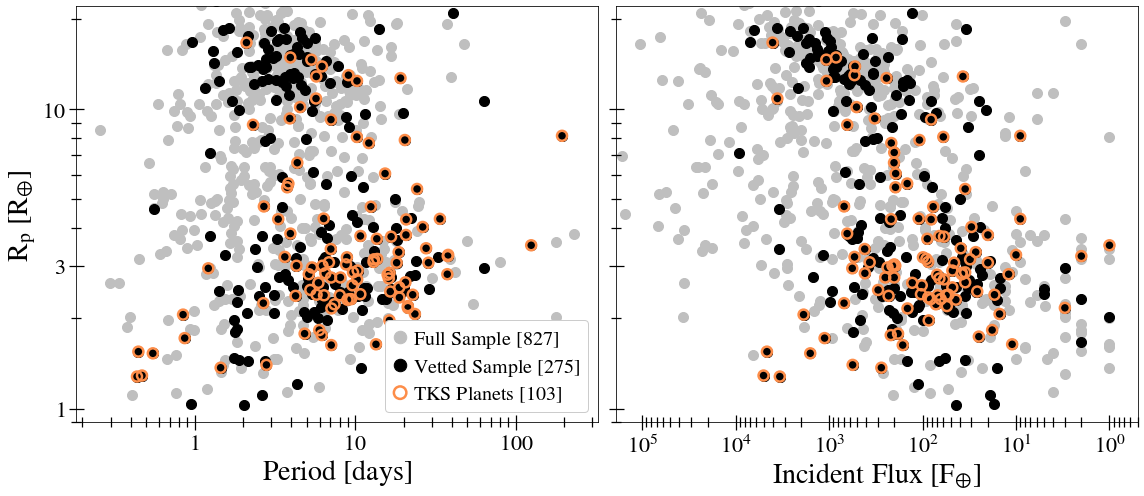

In [24]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1,2,1)

ax1.scatter(df.period.values, df.rp.values, c = '0.75', s = 100, zorder = 0, label = r'$\rm Full \,\, Sample \,\, [%d]$'%len(df))
ax1.scatter(vetted.period.values, vetted.rp.values, c = 'k', s = 100, zorder = 1, label = r'$\rm Vetted \,\, Sample \,\, [%d]$'%len(vetted))
ax1.scatter(sample.period.values, sample.rp.values, c = 'k', s = 100, zorder = 2)
ax1.scatter(sample.period.values, sample.rp.values, c = 'none', s = 100, lw = 2.5, edgecolor = '#fd8d49', zorder = 3, label = r'$\rm TKS \,\, Planets \,\, [%d]$'%len(sample))
ax1.set_ylabel(r"$\rm R_{p}\,\, [R_{\oplus}]$", fontsize = 28)
ax1.set_xlabel(r"$\rm Period\,\, [days]$", fontsize = 28)
ax1.tick_params(axis = 'both', which = 'minor', length = 10, width = 1.25, direction = 'inout')
ax1.tick_params(axis = 'both', which = 'major', length = 15, width = 1.25, direction = 'inout')
plt.yscale("log")
plt.xscale("log")
ax1.set_xticks([1, 10, 100])
ax1.set_xticklabels([r'$1$', r'$10$', r'$100$'])
ax1.set_yticks([1, 3, 10])
ax1.set_yticklabels([r'$1$', r'$3$', r'$10$'])
leg = ax1.legend(fontsize=20, scatteryoffsets=[0.5], framealpha=1.0, columnspacing=0.1, labelspacing=0.3, markerscale=1.25, handletextpad=0.25, handlelength=0.75)
plt.tick_params(labelsize = 22)
plt.ylim([0.9, 22.])

ax2 = plt.subplot(1,2,2)

ax2.scatter(df.sinc.values, df.rp.values, c = '0.75', s = 100, zorder = 0)
ax2.scatter(vetted.sinc.values, vetted.rp.values, c = 'k', s = 100, zorder = 1)
ax2.scatter(sample.sinc.values, sample.rp.values, c = 'k', s = 100, zorder = 2)
ax2.scatter(sample.sinc.values, sample.rp.values, c = 'none', s = 100, lw = 2.5, edgecolor = '#fd8d49', zorder = 3)
ax2.set_xlabel(r"$\rm Incident\,\, Flux\,\, [F_{\oplus}]$", fontsize = 28)
ax2.tick_params(labelsize = 22)
ax2.tick_params(axis = 'both', which = 'minor', length = 10, width = 1.25, direction = 'inout')
ax2.tick_params(axis = 'both', which = 'major', length = 15, width = 1.25, direction = 'inout')
plt.yscale("log")
plt.xscale("log")
ax2.set_xticks([1, 10, 100, 1000, 10000, 100000])
ax2.set_xticklabels([r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$'])
ax2.set_yticks([1, 3, 10])
ax2.set_yticklabels([])
plt.tick_params(labelsize = 22)
plt.xlim([190000., 0.5])
plt.ylim([0.9, 22.])

plt.tight_layout()
plt.show()